# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement

Gatheirng data from the CDC we will analyse the amount of smokers in America. Which state(s) have the highest concentration of smokers(top 5) and what age and gender appear most? Is there a big difference between youth and Adult smokers in America or Genders? 

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type:  CSV File name - Youth_Tobacco_Survey__YTS__Data

Method: *FILL IN* (e.g., The data was gathered using the "Downloading files" method from https://catalog.data.gov/dataset/youth-tobacco-survey-yts-data)

Dataset variables:

Columns in this Dataset:
https://chronicdata.cdc.gov/Survey-Data/Youth-Tobacco-Survey-YTS-Data/4juz-x2tp

- YEAR
- LocationAbbr	
- LocationDesc	
- TopicType	
- TopicDesc	
- MeasureDesc	
- DataSource	
- Response	
- Data_Value_Unit	
- Data_Value_Type	
- Data_Value	
- Data_Value_Footnote_Symbol	
- Data_Value_Footnote	
- Data_Value_Std_Err	
- Low_Confidence_Limit	
- High_Confidence_Limit	
- Sample_Size	
- Gender	
- Race	
- Age	Education	
- GeoLocation	
- TopicTypeId	
- TopicId	
- MeasureId	
- StratificationID1	
- StratificationID2	
- StratificationID3	
- StratificationID4	
- SubMeasureID	
- DisplayOrder


In [1]:
# Import Libraries 

import numpy as np 
import pandas as pd
import json
import requests 
from bs4 import BeautifulSoup
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
# Load in 1st dataset 

data1 = pd.read_csv('Youth_Tobacco_Survey__YTS__Data.csv')
data1.head()

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2004,OH,Ohio,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.060210141, -82.404260056)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
1,2008,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8
2,2015,WV,West Virginia,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(38.665510202, -80.712640135)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS12,12
3,2005,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
4,2005,CT,Connecticut,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(41.56266102, -72.649840952)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS11,11


#### Dataset 2

Type: Json file

Method: The data was gathered using the " https://data.cdc.gov/api/views/wsas-xwh5/rows.json?accessType=DOWNLOAD" I used this url

Dataset variables:

- YEAR 
- LocationAbbr 	
- LocationDesc 
- TopicType 	
- TopicDesc 	
- MeasureDesc 	
- DataSource 	
- Response 	
- Data_Value_Unit 	
- Data_Value_Type 	
- Data_Value 	
- Data_Value_Footnote_Symbol 	
- Data_Value_Footnote 	
- Data_Value_Std_Err 	
- Low_Confidence_Limit 	
- High_Confidence_Limit 	
- Sample_Size 	
- Gender 	
- Race 	
- Age 	
- Education 	
- GeoLocation
- TopicTypeId 	
- TopicId 	
- MeasureId 	
- StratificationID1 	
- StratificationID2 	
- StratificationID3 	
- StratificationID4 	
- SubMeasureID 	
- DisplayOrder

In [3]:
# Get Request 
book = requests.get("https://data.cdc.gov/api/views/wsas-xwh5/rows.json?accessType=DOWNLOAD")
print(book)

<Response [200]>


In [4]:
book.raise_for_status()

### To prevent loading error use this in terminal before running 

yourTerminal:prompt> jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10 

In [ ]:
# Get Json format 
json_data = book.json()
print(json_data)

In [ ]:
with open('book.json', 'w') as f:
    json.dump(json_data, f)

In [ ]:
with open("book.json", "r") as read_file:
    data = json.load(read_file)

In [ ]:
print(data)

## Errors and other possible way to solve it 

After I created this json file I converted it to a csv file as I had many errors trying to convert it in python. The easiest solution I could find was requesting the data and saving the json file to my pc and then converting it to csv file and load it in again and combine it with the first dataset. 

I used this site to do that https://www.aconvert.com/file.php.


In [5]:
#load in data 2 

data2 = pd.read_csv('Adult_Smoking_data_2.csv')
data2.head()

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,2017,GU,Guam,Tobacco Use ?? Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,NaN,%,Percentage,...,6RAC,6EDU,BRF21,21,NaN,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",13.444304,144.793731,NaN,False
1,2018,US,National Median (States and DC),Tobacco Use ?? Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Current,%,Percentage,...,6RAC,6EDU,BRF27,27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,US,National Median (States and DC),Tobacco Use ?? Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Never,%,Percentage,...,6RAC,6EDU,BRF28,28,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,GU,Guam,Tobacco Use ?? Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,NaN,%,Percentage,...,4RAC,6EDU,BRF69,69,NaN,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",13.444304,144.793731,NaN,False
4,2014,GU,Guam,Tobacco Use ?? Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,NaN,%,Percentage,...,5RAC,6EDU,BRF22,22,NaN,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",13.444304,144.793731,NaN,False


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [8]:
#FILL IN - Inspecting the dataframe visually
pd.set_option('display.max_columns', None)
data1.head()

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Race,Age,Education,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2004,OH,Ohio,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,32.2,NaN,NaN,3.2,25.8,38.5,1377.0,Overall,All Races,All Ages,Middle School,"(40.060210141, -82.404260056)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
1,2008,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,47.8,NaN,NaN,2.9,42.1,53.5,654.0,Female,All Races,All Ages,High School,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8
2,2015,WV,West Virginia,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,12.7,NaN,NaN,1.9,9.0,16.4,781.0,Male,All Races,All Ages,High School,"(38.665510202, -80.712640135)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS12,12
3,2005,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,28.5,NaN,NaN,2.2,24.2,32.8,1323.0,Overall,All Races,All Ages,Middle School,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
4,2005,CT,Connecticut,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,20.5,NaN,NaN,2.3,16.0,25.1,973.0,Male,All Races,All Ages,High School,"(41.56266102, -72.649840952)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS11,11


In [9]:
#FILL IN - Inspecting the dataframe programmatically
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        10600 non-null  int64  
 1   LocationAbbr                10600 non-null  object 
 2   LocationDesc                10600 non-null  object 
 3   TopicType                   10600 non-null  object 
 4   TopicDesc                   10600 non-null  object 
 5   MeasureDesc                 10600 non-null  object 
 6   DataSource                  10600 non-null  object 
 7   Response                    8190 non-null   object 
 8   Data_Value_Unit             10600 non-null  object 
 9   Data_Value_Type             10600 non-null  object 
 10  Data_Value                  10080 non-null  float64
 11  Data_Value_Footnote_Symbol  517 non-null    object 
 12  Data_Value_Footnote         517 non-null    object 
 13  Data_Value_Std_Err          100

In [10]:
# Statistic info
data1.describe()

,YEAR,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,DisplayOrder
count,10600.000000,10080.000000,10080.000000,10083.000000,10080.000000,10080.000000,10600.000000
mean,2007.053491,20.336806,1.851429,16.715253,23.961806,1483.412897,8.106887
std,5.462656,21.168271,1.777441,18.575128,23.981915,2189.565233,3.076806
min,1999.000000,0.000000,0.000000,0.000000,0.000000,50.000000,1.000000
25%,2002.000000,3.000000,0.600000,1.700000,4.300000,671.000000,7.000000
50%,2006.000000,10.550000,1.300000,7.900000,13.200000,1001.000000,9.000000
75%,2011.000000,36.425000,2.400000,29.600000,42.500000,1642.000000,11.000000
max,2017.000000,98.000000,16.100000,97.600000,98.400000,36910.000000,12.000000


In [11]:
# Check for duplicates
data1.duplicated().sum()

0

In [12]:
# Check for nulls 
data1.isnull().sum()

YEAR                              0
LocationAbbr                      0
LocationDesc                      0
TopicType                         0
TopicDesc                         0
MeasureDesc                       0
DataSource                        0
Response                       2410
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value                      520
Data_Value_Footnote_Symbol    10083
Data_Value_Footnote           10083
Data_Value_Std_Err              520
Low_Confidence_Limit            517
High_Confidence_Limit           520
Sample_Size                     520
Gender                            0
Race                              0
Age                               0
Education                         0
GeoLocation                       4
TopicTypeId                       0
TopicId                           0
MeasureId                         0
StratificationID1                 0
StratificationID2                 0
StratificationID3           

In [13]:
# What years does the dataset have
data1['YEAR'].value_counts()

YEAR
2000    1224
2002    1016
2009     686
2013     685
2005     636
2004     611
2015     577
2017     544
2011     521
2006     518
2007     516
2003     498
2008     483
2010     447
2001     426
1999     372
2014     334
2016     262
2012     244
Name: count, dtype: int64

In [14]:
# Check age values 
data1['Age'].value_counts()

Age
All Ages    10600
Name: count, dtype: int64

In [15]:
# Check gender values 
data1['Gender'].value_counts()

Gender
Overall    3556
Female     3522
Male       3522
Name: count, dtype: int64

### **Quality Issue 1:**

### FILL IN


- Columns Data_Value_Footnote_Symbol, Data_Value_Footnote missing 10083 values in the each column
- Ages column is unclear with all ages as the only data for youth. 
- Race column is unclear with all races as the only ata for youth.
- Gender column shows "overall" values instead of male or female. Does this mean other? it is unclear what overall means in this context.
- Response column unclear and lacks context to understand what each response means. Needs further updating to better use in context of data. 

### Tidiness Issue 1:

### FILL IN 

- Inconsistent column heading formats. YEAR column is all capitalized while other have underscores and other columns don't.
- Multiple variables stored in one column in Data_Value_Footnote_Symbo & Data_Value_Footnote
- Drop unnecessary columns 

----------------------------------------------

### Quality Issue 2:

In [16]:
#FILL IN - Inspecting the dataframe visually
pd.set_option('display.max_columns', None)
data2.head()

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Race,Age,Education,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,2017,GU,Guam,Tobacco Use ?? Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,NaN,%,Percentage,30.0,NaN,NaN,2.3,25.4,34.6,692.0,Male,All Races,All Ages,All Grades,BEH,100BEH,110CSA,2GEN,8AGE,6RAC,6EDU,BRF21,21,NaN,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",13.444304,144.793731,NaN,False
1,2018,US,National Median (States and DC),Tobacco Use ?? Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Current,%,Percentage,16.1,NaN,NaN,NaN,NaN,NaN,NaN,Overall,All Races,All Ages,All Grades,BEH,100BEH,165SSA,1GEN,8AGE,6RAC,6EDU,BRF27,27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,US,National Median (States and DC),Tobacco Use ?? Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Never,%,Percentage,58.2,NaN,NaN,NaN,NaN,NaN,NaN,Overall,All Races,All Ages,All Grades,BEH,100BEH,165SSA,1GEN,8AGE,6RAC,6EDU,BRF28,28,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,GU,Guam,Tobacco Use ?? Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,NaN,%,Percentage,0.5,NaN,NaN,0.4,0.0,1.2,123.0,Overall,Hispanic,All Ages,All Grades,BEH,150BEH,177SCU,1GEN,8AGE,4RAC,6EDU,BRF69,69,NaN,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",13.444304,144.793731,NaN,False
4,2014,GU,Guam,Tobacco Use ?? Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,NaN,%,Percentage,21.9,NaN,NaN,4.9,12.4,31.4,209.0,Overall,White,All Ages,All Grades,BEH,100BEH,110CSA,1GEN,8AGE,5RAC,6EDU,BRF22,22,NaN,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",13.444304,144.793731,NaN,False


In [17]:
#FILL IN - Inspecting the dataframe programmatically
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43341 entries, 0 to 43340
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        43341 non-null  object 
 1   LocationAbbr                43341 non-null  object 
 2   LocationDesc                43341 non-null  object 
 3   TopicType                   43341 non-null  object 
 4   TopicDesc                   43341 non-null  object 
 5   MeasureDesc                 43341 non-null  object 
 6   DataSource                  43341 non-null  object 
 7   Response                    15018 non-null  object 
 8   Data_Value_Unit             43341 non-null  object 
 9   Data_Value_Type             43341 non-null  object 
 10  Data_Value                  41224 non-null  float64
 11  Data_Value_Footnote_Symbol  2117 non-null   object 
 12  Data_Value_Footnote         2117 non-null   object 
 13  Data_Value_Std_Err          411

In [18]:
# Get statistice info
data2.describe()

,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,SubMeasureID,DisplayOrder,Unnamed: 32,Unnamed: 33,Unnamed: 34
count,41224.000000,41146.000000,41146.000000,41146.000000,41146.000000,43341.000000,41640.000000,43263.000000,43263.000000,0.0
mean,25.355038,1.710589,22.010864,28.679347,3050.171171,47.079278,25.969092,38.805021,-88.337175,NaN
std,25.002588,1.715646,24.135141,26.209196,3798.872768,24.494487,14.699041,7.658440,37.688622,NaN
min,0.000000,0.000000,0.000000,0.000000,50.000000,5.000000,1.000000,13.444304,-157.857749,NaN
25%,5.100000,0.600000,3.200000,6.900000,480.000000,24.000000,13.000000,35.466221,-100.373531,NaN
50%,17.100000,1.100000,14.300000,19.800000,1798.000000,51.000000,26.000000,39.360700,-88.997710,NaN
75%,38.900000,2.200000,30.500000,47.400000,4203.000000,71.000000,39.000000,43.235541,-77.860700,NaN
max,99.900000,16.600000,99.800000,100.000000,40726.000000,81.000000,51.000000,64.845080,144.793731,NaN


In [19]:
# Check for duplicates 
data2.duplicated().sum()

0

In [20]:
# Check for nulls 
data2.isnull().sum()

YEAR                              0
LocationAbbr                      0
LocationDesc                      0
TopicType                         0
TopicDesc                         0
MeasureDesc                       0
DataSource                        0
Response                      28323
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value                     2117
Data_Value_Footnote_Symbol    41224
Data_Value_Footnote           41224
Data_Value_Std_Err             2195
Low_Confidence_Limit           2195
High_Confidence_Limit          2195
Sample_Size                    2195
Gender                            0
Race                              0
Age                               0
Education                         0
GeoLocation                       0
TopicTypeId                       0
TopicId                           0
MeasureId                         0
StratificationID1                 0
StratificationID2                 0
StratificationID3           

In [21]:
# Check Race values 
data2['Race'].value_counts()

Race
All Races                        33206
Hispanic                          2027
White                             2027
American Indian/Alaska Native     2027
African American                  2027
Asian/Pacific Islander            2027
Name: count, dtype: int64

In [22]:
#Check gender values
data2['Gender'].value_counts()

Gender
Overall    28178
Female      8128
Male        7035
Name: count, dtype: int64

In [23]:
# Check age values
data2['Age'].value_counts()

Age
All Ages              31318
Age 25 and Older       3279
Age 20 and Older       3279
18 to 24 Years         1093
18 to 44 Years         1093
45 to 64 Years         1093
25 to 44 Years         1093
65 Years and Older     1093
Name: count, dtype: int64

### **Quality Issue 1:**

 - Coloumns missing high amount of values in the columns Data_Value_Footnote_Symbol, Data_Value_Footnote, Response           
 - Age column All ages has unclear meaning Does All Ages mean NAN/Other? 
 - Race column All races has unclear meaning. Does All Races mean NAN/Other?
 - gender column Overall has unclear meaning. Does it mean NaN/Other? 

### Tidiness Issue 2: 

 - Year column should be changed to Int from string 
 - Column names are inconsistent with capitilization and underscores  
 - Multiple variables stored in one column
 - Certain columns are unnamed
 - Drop unnecessary columns 
 - Nested columns 

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [24]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
youth_data = data1.copy()
adult_data = data2.copy()

In [25]:
youth_data.head(2)

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Race,Age,Education,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2004,OH,Ohio,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,32.2,NaN,NaN,3.2,25.8,38.5,1377.0,Overall,All Races,All Ages,Middle School,"(40.060210141, -82.404260056)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
1,2008,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,47.8,NaN,NaN,2.9,42.1,53.5,654.0,Female,All Races,All Ages,High School,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8


In [26]:
adult_data.head(2)

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Race,Age,Education,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,2017,GU,Guam,Tobacco Use ?? Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,NaN,%,Percentage,30.0,NaN,NaN,2.3,25.4,34.6,692.0,Male,All Races,All Ages,All Grades,BEH,100BEH,110CSA,2GEN,8AGE,6RAC,6EDU,BRF21,21,NaN,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",13.444304,144.793731,NaN,False
1,2018,US,National Median (States and DC),Tobacco Use ?? Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Current,%,Percentage,16.1,NaN,NaN,NaN,NaN,NaN,NaN,Overall,All Races,All Ages,All Grades,BEH,100BEH,165SSA,1GEN,8AGE,6RAC,6EDU,BRF27,27,NaN,NaN,NaN,NaN,NaN,NaN


---------------------------------------

## Youth Data Cleaning 

- Remove all unneeded columns 

We are only focusing on columns that giv eus data on Year, location/state, gender, race and Education (optional). All other columns will be removed except those. 

### **Remove unnecessary variables **

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [27]:
# FILL IN - Apply the cleaning strategy 
# Drop unnecessary columns 

youth_data = youth_data.drop(['TopicType', 'MeasureDesc','DataSource','Response','Data_Value_Unit','Data_Value_Type','Data_Value','Data_Value_Footnote_Symbol','Data_Value_Footnote','Data_Value_Std_Err','Low_Confidence_Limit', 'High_Confidence_Limit','Sample_Size',
                             'GeoLocation', 'TopicTypeId', 'TopicId','MeasureId','StratificationID1','StratificationID2', 'StratificationID3', 'StratificationID4', 'SubMeasureID', 'DisplayOrder', 
                              'StratificationID1', 'StratificationID2', 'StratificationID3', 'StratificationID4','SubMeasureID', 'DisplayOrder'], axis=1)

In [28]:
# Check columns 
youth_data.head()

,YEAR,LocationAbbr,LocationDesc,TopicDesc,Gender,Race,Age,Education
0,2004,OH,Ohio,Cigarette Use (Youth),Overall,All Races,All Ages,Middle School
1,2008,AL,Alabama,Cigarette Use (Youth),Female,All Races,All Ages,High School
2,2015,WV,West Virginia,Smokeless Tobacco Use (Youth),Male,All Races,All Ages,High School
3,2005,IL,Illinois,Cigarette Use (Youth),Overall,All Races,All Ages,Middle School
4,2005,CT,Connecticut,Smokeless Tobacco Use (Youth),Male,All Races,All Ages,High School


In [29]:
# FIx column names to be consistent 
youth_data = youth_data.rename(columns=lambda x: x.replace('YEAR', 'Year'))

In [30]:
#Verify Change
youth_data.head()

,Year,LocationAbbr,LocationDesc,TopicDesc,Gender,Race,Age,Education
0,2004,OH,Ohio,Cigarette Use (Youth),Overall,All Races,All Ages,Middle School
1,2008,AL,Alabama,Cigarette Use (Youth),Female,All Races,All Ages,High School
2,2015,WV,West Virginia,Smokeless Tobacco Use (Youth),Male,All Races,All Ages,High School
3,2005,IL,Illinois,Cigarette Use (Youth),Overall,All Races,All Ages,Middle School
4,2005,CT,Connecticut,Smokeless Tobacco Use (Youth),Male,All Races,All Ages,High School


Column title should be consistent and follow best practices and for ease of understanding. 

### **Quality Issue 2: FILL IN**

In [31]:
#FILL IN - Apply the cleaning strategy
#Change topic Description to Youth Only Word

youth_data['TopicDesc']=youth_data['TopicDesc'].apply(lambda x: x.replace('Cigarette', '').replace('Use', '').replace(' Tobacco', '').replace('(','').replace(')','').replace('Smokeless','').replace('Cessation',''))

In [32]:
#FILL IN - Validate the cleaning was successful

youth_data.head()

,Year,LocationAbbr,LocationDesc,TopicDesc,Gender,Race,Age,Education
0,2004,OH,Ohio,Youth,Overall,All Races,All Ages,Middle School
1,2008,AL,Alabama,Youth,Female,All Races,All Ages,High School
2,2015,WV,West Virginia,Youth,Male,All Races,All Ages,High School
3,2005,IL,Illinois,Youth,Overall,All Races,All Ages,Middle School
4,2005,CT,Connecticut,Youth,Male,All Races,All Ages,High School


Justification: *FILL IN*

When combining the adult and youth data together it should be clear which one is youth or adult. We only need the word "Youth" from this dataset and not the type of smoking method.   

---------------------------------------------------------------------------------

## Adult_data Cleaning

- Remove all unneeded columns 

We are only focusing on columns that giv eus data on Year, location/state, gender, race and Education (optional). All other columns will be removed except those. 

### **Remove unnecessary variables **

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [33]:
# Drop unnecessary columns 

adult_data = adult_data.drop(['TopicType', 'MeasureDesc','DataSource','Response','Data_Value_Unit','Data_Value_Type','Data_Value','Data_Value_Footnote_Symbol','Data_Value_Footnote','Data_Value_Std_Err','Low_Confidence_Limit', 'High_Confidence_Limit','Sample_Size',
                             'GeoLocation', 'TopicTypeId', 'TopicId','MeasureId','StratificationID1','StratificationID2', 'StratificationID3', 'StratificationID4', 'SubMeasureID', 'DisplayOrder', 
                              'StratificationID1', 'StratificationID2', 'StratificationID3', 'StratificationID4','SubMeasureID', 'DisplayOrder',
                             'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35'], axis=1)

In [34]:
adult_data.head(2)

,YEAR,LocationAbbr,LocationDesc,TopicDesc,Gender,Race,Age,Education
0,2017,GU,Guam,Cigarette Use (Adults),Male,All Races,All Ages,All Grades
1,2018,US,National Median (States and DC),Cigarette Use (Adults),Overall,All Races,All Ages,All Grades


### **Tidiness Issue 1: FILL IN**

In [35]:
# FIx column names to be consistent 
adult_data = adult_data.rename(columns=lambda x: x.replace('YEAR', 'Year'))

In [36]:
#FILL IN - Validate the cleaning was successful
adult_data.head(2)

,Year,LocationAbbr,LocationDesc,TopicDesc,Gender,Race,Age,Education
0,2017,GU,Guam,Cigarette Use (Adults),Male,All Races,All Ages,All Grades
1,2018,US,National Median (States and DC),Cigarette Use (Adults),Overall,All Races,All Ages,All Grades


Justification: *FILL IN*

Column title should be consistent and follow best practices and for ease of understanding. 

### **Tidiness Issue 2: FILL IN**

In [37]:
#FILL IN - Apply the cleaning strategy

#FILL IN - Apply the cleaning strategy
#Change topic Description to Adult Only Word

adult_data['TopicDesc']=adult_data['TopicDesc'].apply(lambda x: x.replace('Cigarette', '').replace('Use', '').replace(' Tobacco', '').replace('(','').replace(')','').replace('Smokeless','').replace('Cessation',''))

In [38]:
#FILL IN - Validate the cleaning was successful
adult_data.head(2)

,Year,LocationAbbr,LocationDesc,TopicDesc,Gender,Race,Age,Education
0,2017,GU,Guam,Adults,Male,All Races,All Ages,All Grades
1,2018,US,National Median (States and DC),Adults,Overall,All Races,All Ages,All Grades


Justification: *FILL IN*

Analyzing youth vs adult data it should be clear which one is adult and youth so we removed unnecessary words in the TopicDesc column to prevent confusing and errors when combining the datasets. 

--------------------------------------

# Combine Clean Datasets

In [39]:
#FILL IN - combine datasets

smoking_data = pd.concat([youth_data, adult_data], axis=0)
smoking_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53941 entries, 0 to 43340
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          53941 non-null  object
 1   LocationAbbr  53941 non-null  object
 2   LocationDesc  53941 non-null  object
 3   TopicDesc     53941 non-null  object
 4   Gender        53941 non-null  object
 5   Race          53941 non-null  object
 6   Age           53941 non-null  object
 7   Education     53941 non-null  object
dtypes: object(8)
memory usage: 3.7+ MB


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [40]:
#FILL IN - saving data
youth_data.to_csv("clean_yd.csv", index =False)
adult_data.to_csv("clean_ad.csv", index = False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 


Smokers in America: Which state(s) have the highest concentration of smokers(top 10) and what age and gender appear most? Is there a big difference between youth and Adult smokers in America or Genders?

In [41]:
# review data quick 
smoking_data.head()

,Year,LocationAbbr,LocationDesc,TopicDesc,Gender,Race,Age,Education
0,2004,OH,Ohio,Youth,Overall,All Races,All Ages,Middle School
1,2008,AL,Alabama,Youth,Female,All Races,All Ages,High School
2,2015,WV,West Virginia,Youth,Male,All Races,All Ages,High School
3,2005,IL,Illinois,Youth,Overall,All Races,All Ages,Middle School
4,2005,CT,Connecticut,Youth,Male,All Races,All Ages,High School


*Research question:* FILL IN from answer: Which state(s) have the highest concentration of smokers (top 5) 

In [42]:
#Visual 1 - FILL IN
smoking_data['LocationAbbr'].value_counts()

LocationAbbr
MS    1482
WI    1239
CT    1236
NC    1233
AL    1218
ND    1209
NJ    1203
DE    1185
WV    1170
MO    1149
HI    1143
SC    1140
OK    1134
GA    1134
OH    1134
PA    1122
IN    1119
LA    1119
IA    1107
NE    1089
IL    1074
SD    1065
AZ    1056
KY    1047
AR    1041
NH    1011
MN    1008
TN     999
KS     978
RI     975
UT     975
MI     930
MD     927
FL     927
NY     921
CA     888
VT     888
ID     879
GU     879
TX     879
MA     879
VA     876
WY     855
CO     840
DC     840
ME     840
AK     831
OR     831
MT     831
NM     816
PR     798
WA     792
NV     792
US     112
VI      96
Name: count, dtype: int64

*Answer to research question:* FILL IN

MS / Mississippi has the highest count with 1,482 smokers recorded both for youth and adults combined (ratio unknown). 

- MS    1482
- WI    1239
- CT    1236
- NC    1233
- AL    1218
- ND    1209
- NJ    1203
- DE    1185
- WV    1170
- MO    1149

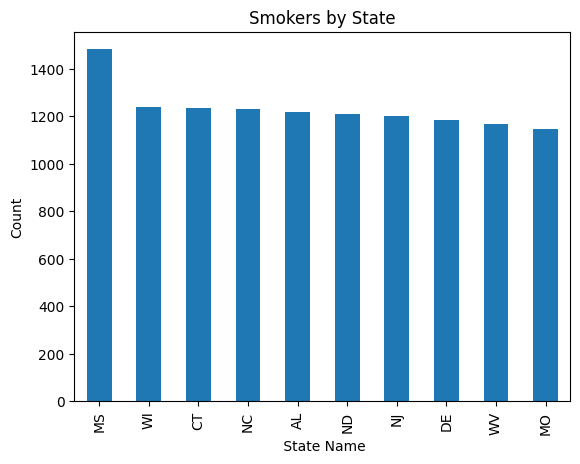

In [63]:
#Visual 2 - FILL IN
smoking_data['LocationAbbr'].value_counts()[:10].plot(kind='bar')
plt.title("Smokers by State")
plt.xlabel(" State Name")
plt.ylabel("Count");

*Answer to research question:* FILL What gender smokes the most?

In [44]:
# Find gender total count 
smoking_data['Gender'].value_counts()

Gender
Overall    31734
Female     11650
Male       10557
Name: count, dtype: int64

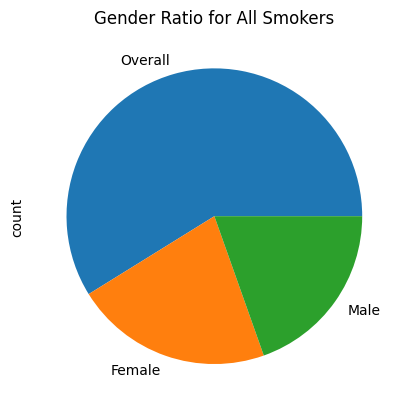

In [58]:
# Visualize it 
smoking_data['Gender'].value_counts().plot(kind='pie')
plt.title("Gender Ratio for All Smokers");

--------------------------------------------

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

------------------------------------------------------------------------------------------------------------------------------------------

If given more time I would analyze smokers in greater detail through education levels. Understand the unclear data for Races, Ages, and Gender as the data is unclear what is means. I could discover many trends linking to age, race, gender, education and state. Also Anlyzing the trends of smokers by year. The Adult data starts from 2011 but the youth data year 2000. I would clean seperate the data from 2011 for both datasets and have a better understanding of adult vs youth smokers from this dataset. 

For example: 

1. Analyze Year in greater detail and see what trends appear for both youth and adults

maybe 2005 was the highest peak for adult smokers but it changed to youth in another year. 

2. Smoking trends by method

e-cigarettes, tabaccoo, cigarettes and track which and age/gender uses each method in every state.  